# Polarization

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import animatplot as amp

Let's create the data.

In [2]:
E0 = np.array([1, 2])
E0 = E0 / np.linalg.norm(E0)

phi = np.array([0, np.pi / 7])

f = 3
t = np.linspace(0, 2 * np.pi, 50)

# The Electric Field
E = E0[:, np.newaxis] * np.exp(
    1j * (t + phi[:, np.newaxis])
)  # fancy array boardcasting

# Converting the Electric field into animatable arrows.
X = np.zeros(3)  # x location of the arrow tails
Y = np.zeros(3)  # y location of the arrow tails

zeros = np.zeros_like(E[0, :])  # padding
U = np.array([E[0, :], zeros, E[0, :]]).real
V = np.array([zeros, E[1, :], E[1, :]]).real

Now to animate it.

<IPython.core.display.Javascript object>


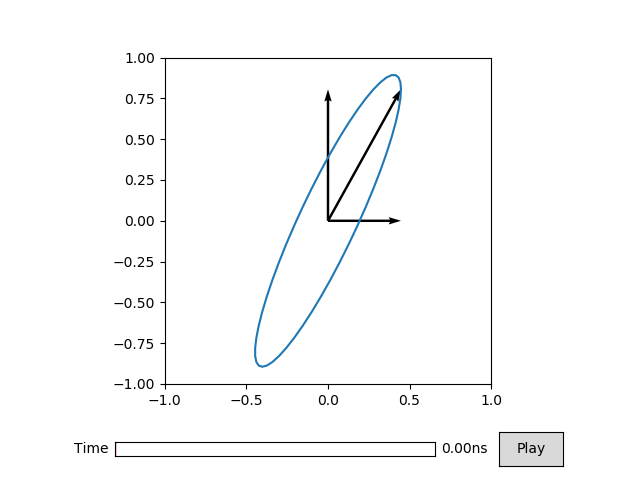

In [3]:
plt.plot(E[0].real, E.real[1])

timeline = amp.Timeline(t, units="ns", fps=20)
block = amp.blocks.Quiver(X, Y, U, V, t_axis=1, scale_units="xy", scale=1)
anim = amp.Animation([block], timeline)

block.ax.set_aspect("equal")
block.ax.set_xlim([-1, 1])
block.ax.set_ylim([-1, 1])

anim.controls()
anim.save_gif("polarization")
plt.show()